# Best First Search 

In [1]:
import heapq

# Graph adjacency list 
graph = {
    'Src': ['1', '2', '3'],
    '1': ['4', '5'],
    '2': ['6'],
    '3': ['7', '8'],
    '4': [], '5': [], '6': [], '7': ['dest'], '8': ['dest'], 'dest': []
}

# Heuristic values for Best First Search (lower is better)
heuristics = {
    'Src': 20,
    '1': 22, '2': 21, '3': 10,
    '4': 25, '5': 24, '6': 30,
    '7': 5, '8': 12,
    'dest': 0
}

def best_first_search(graph, heuristics, start, goal):
    # Priority Queue to always choose node with lowest heuristic
    open_set = []
    heapq.heappush(open_set, (heuristics[start], start))
    
    visited = set()
    parent = {start: None}

    while open_set:
        h, current = heapq.heappop(open_set)
        print(f"Visiting: {current}")

        if current == goal:
            # Reconstruct the path from parent dictionary
            path = []
            while current:
                path.append(current)
                current = parent[current]
            path.reverse()
            return path

        visited.add(current)

        # Explore all neighbors
        for neighbor in graph[current]:
            if neighbor not in visited:
                heapq.heappush(open_set, (heuristics[neighbor], neighbor))
                parent[neighbor] = current

    return None  # Goal not found

# Run Best First Search
path = best_first_search(graph, heuristics, 'Src', 'dest')
print("Best First Search Path:", path)


Visiting: Src
Visiting: 3
Visiting: 7
Visiting: dest
Best First Search Path: ['Src', '3', '7', 'dest']


# Beam Search Algorithm 

In [3]:
import heapq
# Define a complex graph with heuristic values
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': ['G', 'H'],
    'D': ['I', 'J'],
    'E': [], 
    'F': [],
    'G': [], 
    'H': [], 
    'I': [], 
    'J': ['K'],
    'K': []
}

# Heuristic values (lower is better)
heuristics = {
    'A': 10,
    'B': 8, 
    'C': 7, 
    'D': 6,
    'E': 5, 
    'F': 4,
    'G': 6, 
    'H': 3,
    'I': 9, 
    'J': 2,
    'K': 0  # Goal node
}

def beam_search(graph, heuristics, start, goal, beam_width):
    from collections import deque

    queue = deque([[start]])  # Each element is a path
    while queue:
        candidates = []

        # Expand all paths in the current beam
        while queue:
            path = queue.popleft()
            node = path[-1]

            if node == goal:
                print(f"Goal '{goal}' found! Path: {' -> '.join(path)}")
                return path

            for neighbor in graph.get(node, []):
                new_path = path + [neighbor]
                candidates.append((heuristics[neighbor], new_path))

        # Select top-k paths based on heuristic
        candidates.sort(key=lambda x: x[0])
        queue = deque([path for _, path in candidates[:beam_width]])

    print(f"Goal '{goal}' not found within beam width {beam_width}")
    return None

# Example usage
start_node = 'A'
goal_node = 'K'
beam_width = 2

beam_search(graph, heuristics, start_node, goal_node, beam_width)

Goal 'K' found! Path: A -> D -> J -> K


['A', 'D', 'J', 'K']

C:\Users\mubi\AppData\Local\Temp\ipykernel_6740\726708805.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


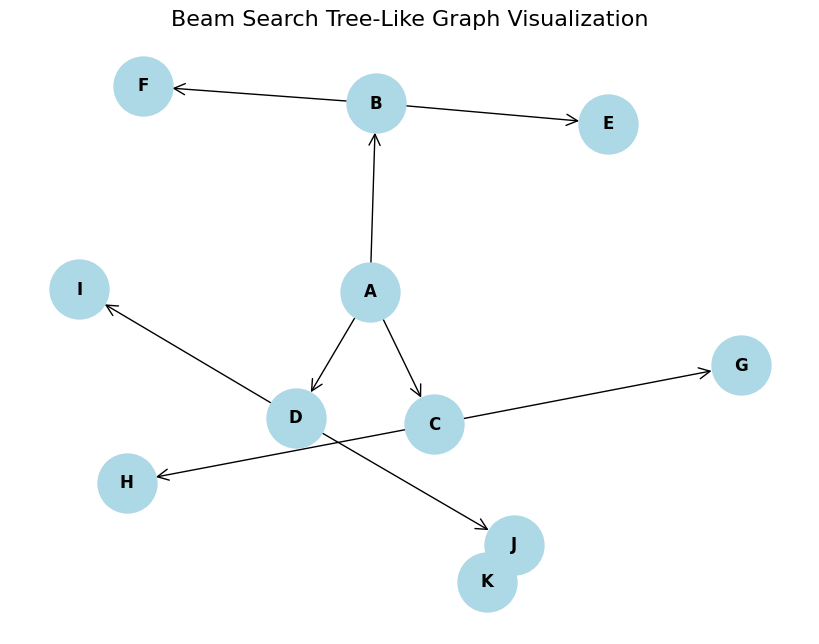

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph structure
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': ['G', 'H'],
    'D': ['I', 'J'],
    'J': ['K'],
    'E': [], 'F': [], 'G': [], 'H': [], 'I': [], 'K': []
}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Set layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1800,
        font_size=12, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=20)

plt.title("Beam Search Tree-Like Graph Visualization", fontsize=16)
plt.tight_layout()
plt.show()

# A* Search Algorithm

In [2]:
import heapq
# Define the graph with edge costs (g(n))
graph = {
    'Src': [('1', 3), ('2', 2), ('3', 1)],
    '1': [('4', 4), ('5', 6)],
    '2': [('6', 6)],
    '3': [('7', 2), ('8', 2)],
    '4': [],
    '5': [],
    '6': [],
    '7': [('dest', 3)],
    '8': [('dest', 3)],
    'dest': []
}

# Define the heuristic values (h(n))
heuristics = {
    'Src': 20,
    '1': 22,
    '2': 21,
    '3': 10,
    '4': 25,
    '5': 24,
    '6': 30,
    '7': 5,
    '8': 12,
    'dest': 0
}

# A* algorithm
def a_star(graph, heuristics, start, goal):
    open_set = []
    heapq.heappush(open_set, (heuristics[start], 0, start, [start]))  

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current == goal:
            return path, g  # Return path and total cost

        for neighbor, cost in graph[current]:
            new_g = g + cost
            new_f = new_g + heuristics[neighbor]
            heapq.heappush(open_set, (new_f, new_g, neighbor, path + [neighbor]))

    return None, float('inf')

# Run the A* algorithm
path, total_cost = a_star(graph, heuristics, 'Src', 'dest')
print("A* Path:", path)
print("Total Cost:", total_cost)


A* Path: ['Src', '3', '7', 'dest']
Total Cost: 6
